In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_json("train.json")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [12]:
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [13]:
df["cuisine"].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [14]:
len(df['ingredients'].explode().unique())

6714

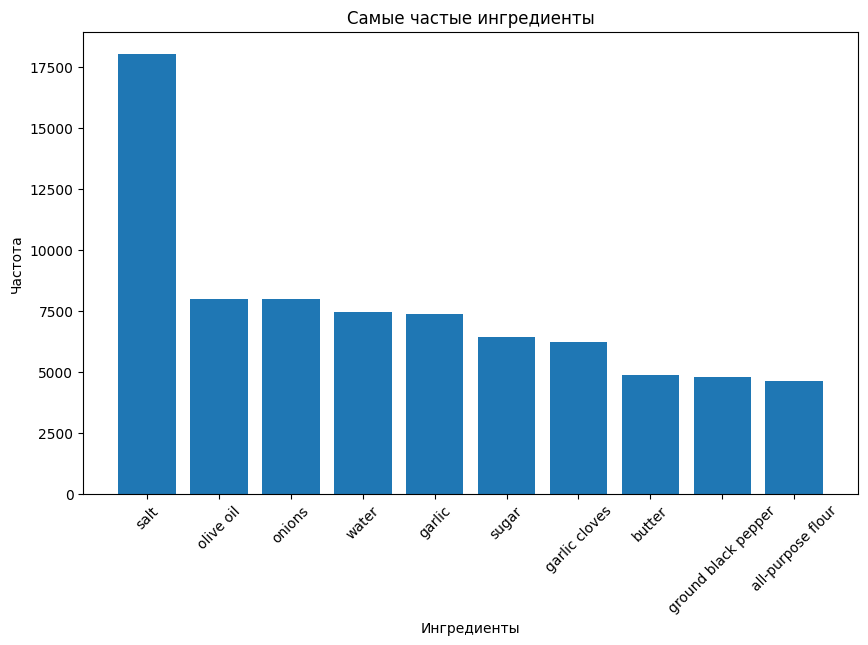

In [15]:
top_ingredients = df['ingredients'].explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_ingredients.index, top_ingredients.values)
plt.xlabel('Ингредиенты')
plt.ylabel('Частота')
plt.title('Самые частые ингредиенты')
plt.xticks(rotation=45) 

plt.show()

Проведём кластеризацию, предварительно подготовив данные с помощью метода Term Frequency-Inverse Document Frequency (TF-IDF).

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["txt"] = df["ingredients"].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["txt"])

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans2'] = kmeans.fit_predict(X)

df["kmeans2"].value_counts()

kmeans2
1    24113
0    15661
Name: count, dtype: int64

Содержимое первого кластера -- салаты и блюда с овощами.

In [18]:
def explore_cluster(num:int):
    for i in df[df["kmeans2"] == num].head(10)["ingredients"]:
        print(i)
        
explore_cluster(1)

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
['plain flour', 'ground pepper', 'salt', 'tomatoes', 'ground black pepper', 'thyme', 'eggs', 'green tomatoes', 'yellow corn meal', 'milk', 'vegetable oil']
['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']
['black pepper', 'shallots', 'cornflour', 'cayenne pepper', 'onions', 'garlic paste', 'milk', 'butter', 'salt', 'lemon juice', 'water', 'chili powder', 'passata', 'oil', 'ground cumin', 'boneless chicken skinless thigh', 'garam masala', 'double cream', 'natural yogurt', 'bay leaf']
['olive oil', 'salt', 'medium shrimp', 'pepper', 'garlic', 'chopped cilantro', 'jalapeno chilies', 'flat leaf parsley', 'skirt steak', 'white vinegar', 'sea salt', 'bay leaf', 'chorizo sausage']
['olive oil', 'purple onion', 'fresh pineapple',

Содержимое нулевого кластера -- выпечка и сладости.

In [19]:
explore_cluster(0)

['water', 'vegetable oil', 'wheat', 'salt']
['plain flour', 'sugar', 'butter', 'eggs', 'fresh ginger root', 'salt', 'ground cinnamon', 'milk', 'vanilla extract', 'ground ginger', 'powdered sugar', 'baking powder']
['sugar', 'pistachio nuts', 'white almond bark', 'flour', 'vanilla extract', 'olive oil', 'almond extract', 'eggs', 'baking powder', 'dried cranberries']
['low sodium soy sauce', 'fresh ginger', 'dry mustard', 'green beans', 'white pepper', 'sesame oil', 'scallions', 'canola oil', 'sugar', 'Shaoxing wine', 'garlic', 'ground turkey', 'water', 'crushed red pepper flakes', 'corn starch']
['greek yogurt', 'lemon curd', 'confectioners sugar', 'raspberries']
['sugar', 'hot chili', 'asian fish sauce', 'lime juice']
['pork loin', 'roasted peanuts', 'chopped cilantro fresh', 'hoisin sauce', 'creamy peanut butter', 'chopped fresh mint', 'thai basil', 'rice', 'medium shrimp', 'water', 'rice noodles', 'beansprouts']
['low-fat mayonnaise', 'pepper', 'salt', 'baking potatoes', 'eggs', 'spi

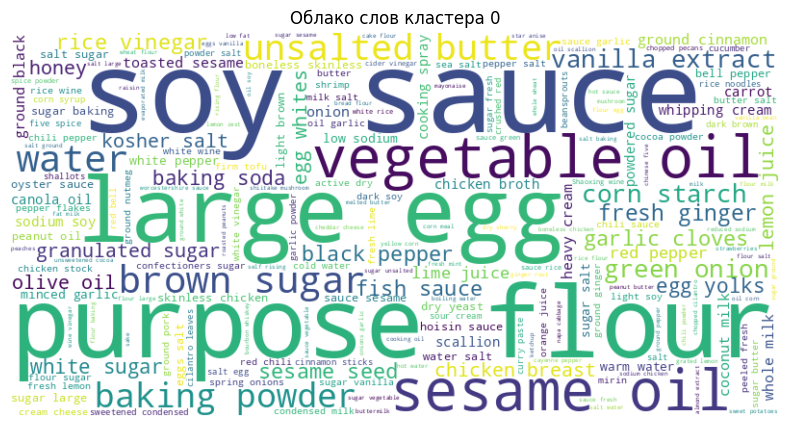

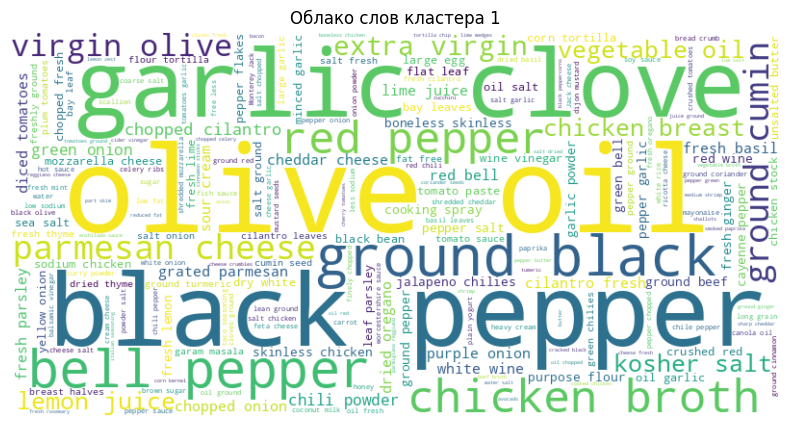

In [20]:
from wordcloud import WordCloud

cluster0_words = ' '.join(df[df["kmeans2"] == 0]['ingredients'].explode())
cluster1_words = ' '.join(df[df["kmeans2"] == 1]['ingredients'].explode())

wordcloud0 = WordCloud(width=800, height=400, background_color='white').generate(cluster0_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов кластера 0')
plt.show()

wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(cluster1_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов кластера 1')
plt.show()

Попробуем указать другое количество кластеров, на котором получаются "объяснимые" результаты.

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans3'] = kmeans.fit_predict(X)

df["kmeans3"].value_counts()

kmeans3
1    25964
0     7153
2     6657
Name: count, dtype: int64

Не выявил закономерности:

In [22]:
df[df["kmeans3"] == 0].head(20)[["ingredients", "cuisine"]]

,ingredients,cuisine
5,"[plain flour, sugar, butter, eggs, fresh ginge...",jamaican
7,"[sugar, pistachio nuts, white almond bark, flo...",italian
22,"[low-fat mayonnaise, pepper, salt, baking pota...",southern_us
29,"[flour tortillas, cheese, breakfast sausages, ...",mexican
45,"[eggs, mandarin oranges, water, orange liqueur...",chinese
47,"[sugar, all-purpose flour, vegetable oil, whit...",southern_us
53,"[sugar, large eggs, all-purpose flour, baking ...",southern_us
56,"[melted butter, matcha green tea powder, white...",japanese
67,"[vanilla, milk, large egg yolks, sugar, corn s...",french
77,"[sweetened condensed milk, ice, espresso]",vietnamese


В основном, Европейские блюда:

In [23]:
df[df["kmeans3"] == 1].head(20)[["ingredients", "cuisine"]]

,ingredients,cuisine
0,"[romaine lettuce, black olives, grape tomatoes...",greek
1,"[plain flour, ground pepper, salt, tomatoes, g...",southern_us
3,"[water, vegetable oil, wheat, salt]",indian
4,"[black pepper, shallots, cornflour, cayenne pe...",indian
6,"[olive oil, salt, medium shrimp, pepper, garli...",spanish
8,"[olive oil, purple onion, fresh pineapple, por...",mexican
9,"[chopped tomatoes, fresh basil, garlic, extra-...",italian
10,"[pimentos, sweet pepper, dried oregano, olive ...",italian
12,"[Italian parsley leaves, walnuts, hot red pepp...",italian
13,"[ground cinnamon, fresh cilantro, chili powder...",mexican


В основном, азиатские блюда:

In [24]:
df[df["kmeans3"] == 2].head(20)[["ingredients", "cuisine"]]

,ingredients,cuisine
2,"[eggs, pepper, salt, mayonaise, cooking oil, g...",filipino
11,"[low sodium soy sauce, fresh ginger, dry musta...",chinese
18,"[sugar, hot chili, asian fish sauce, lime juice]",thai
19,"[soy sauce, vegetable oil, red bell pepper, ch...",vietnamese
20,"[pork loin, roasted peanuts, chopped cilantro ...",thai
23,"[sesame seeds, red pepper, yellow peppers, wat...",chinese
25,"[sugar, lo mein noodles, salt, chicken broth, ...",chinese
28,"[green bell pepper, egg roll wrappers, sweet a...",chinese
33,"[eggs, shallots, firm tofu, beansprouts, turni...",thai
37,"[chicken broth, cooking oil, chinese five-spic...",filipino


Оценим качество кластеризации для рассмотренных ранее вариантов с помощью коэффициента силуэта (silhouette_score).

In [25]:
from sklearn.metrics import silhouette_score

k2 = df["kmeans2"]
k3 = df["kmeans3"]
print(f"Средний коэффициент силуэта K-means, 2 кластера: {silhouette_score(X, k2):.4f}")
print(f"Средний коэффициент силуэта K-means, 3 кластера: {silhouette_score(X, k3):.4f}")

Средний коэффициент силуэта K-means, 2 кластера: 0.0184
Средний коэффициент силуэта K-means, 3 кластера: 0.0194


Создадим кластеризацию для 20 кластеров (по количеству уникальных значений в cuisine)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded'] = le.fit_transform(df["cuisine"])

kmeans = KMeans(n_clusters=20, random_state=42)
df['kmeans20'] = kmeans.fit_predict(X)

k20 = df["kmeans20"]
print(f"Средний коэффициент силуэта K-means, 20 кластеров: {silhouette_score(X, k20):.4f}")

Средний коэффициент силуэта K-means, 20 кластеров: 0.0202


Применим метод кластеризации AgglomerativeClustering

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# n = 1000
# pca = PCA(n_components=n)
# X_pca = pca.fit_transform(X.toarray())

# X_pca = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(n)])

agglomerative = AgglomerativeClustering(n_clusters=20)

df['agglomerative'] = agglomerative.fit_predict(X.toarray())

df["agglomerative"].value_counts()

agglomerative
8     6864
1     5239
5     4179
0     3673
15    3086
7     2334
13    2331
2     1618
11    1550
3     1499
4     1493
6     1492
9      932
12     691
17     658
16     616
10     534
18     493
19     322
14     170
Name: count, dtype: int64

In [29]:
agglomerative = df["agglomerative"]
print(f"Средний коэффициент силуэта agglomerative, 20 кластеров: {silhouette_score(X, agglomerative):.4f}")

Средний коэффициент силуэта agglomerative, 20 кластеров: -0.0016


Оценим качество класстеризации исходя из того, что cuisine — истинная метка принадлежности кластеру.

In [30]:
from sklearn.metrics import adjusted_rand_score

ari_scoreKmean = adjusted_rand_score(df['encoded'], df["kmeans20"])
ari_scoreAgglomerative = adjusted_rand_score(df['encoded'], df["agglomerative"])

print(f"Adjusted Rand Index (ARI) K-mean: {ari_scoreKmean:.4f}")
print(f"Adjusted Rand Index (ARI) Agglomerative: {ari_scoreAgglomerative:.4f}")

Adjusted Rand Index (ARI) K-mean: 0.1362
Adjusted Rand Index (ARI) Agglomerative: 0.1574
